In [1]:
import numpy as np

In [2]:
S0 = 100
K = 105
T = 1
r = 0.01
sigma = 0.2

In [11]:
# Parameters
M = 50        # number of time steps
dt = T / M    # length of time interval
I = 25000     # number of paths

In [12]:
# Simulate I paths with M time steps
S = np.zeros((M+1,I))
S[0] = S0
for t in range(1, M+1):
    z = np.random.standard_normal(I)
    S[t] = S[t-1]*np.exp((r - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*z)

In [13]:
S.shape

(51, 25000)

In [14]:
# Calculate the Monte Carlo estimate of the call option

np.exp(-r*T) * np.sum(np.maximum(S[-1] - K, 0))/I

6.320953079150696

In [15]:
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 150

In [16]:
P_T = S[-1]

In [17]:
def round10(x, base=10):
    return base * round(x/base)

lb = round10(P_T.min())
ub = round10(P_T.max())

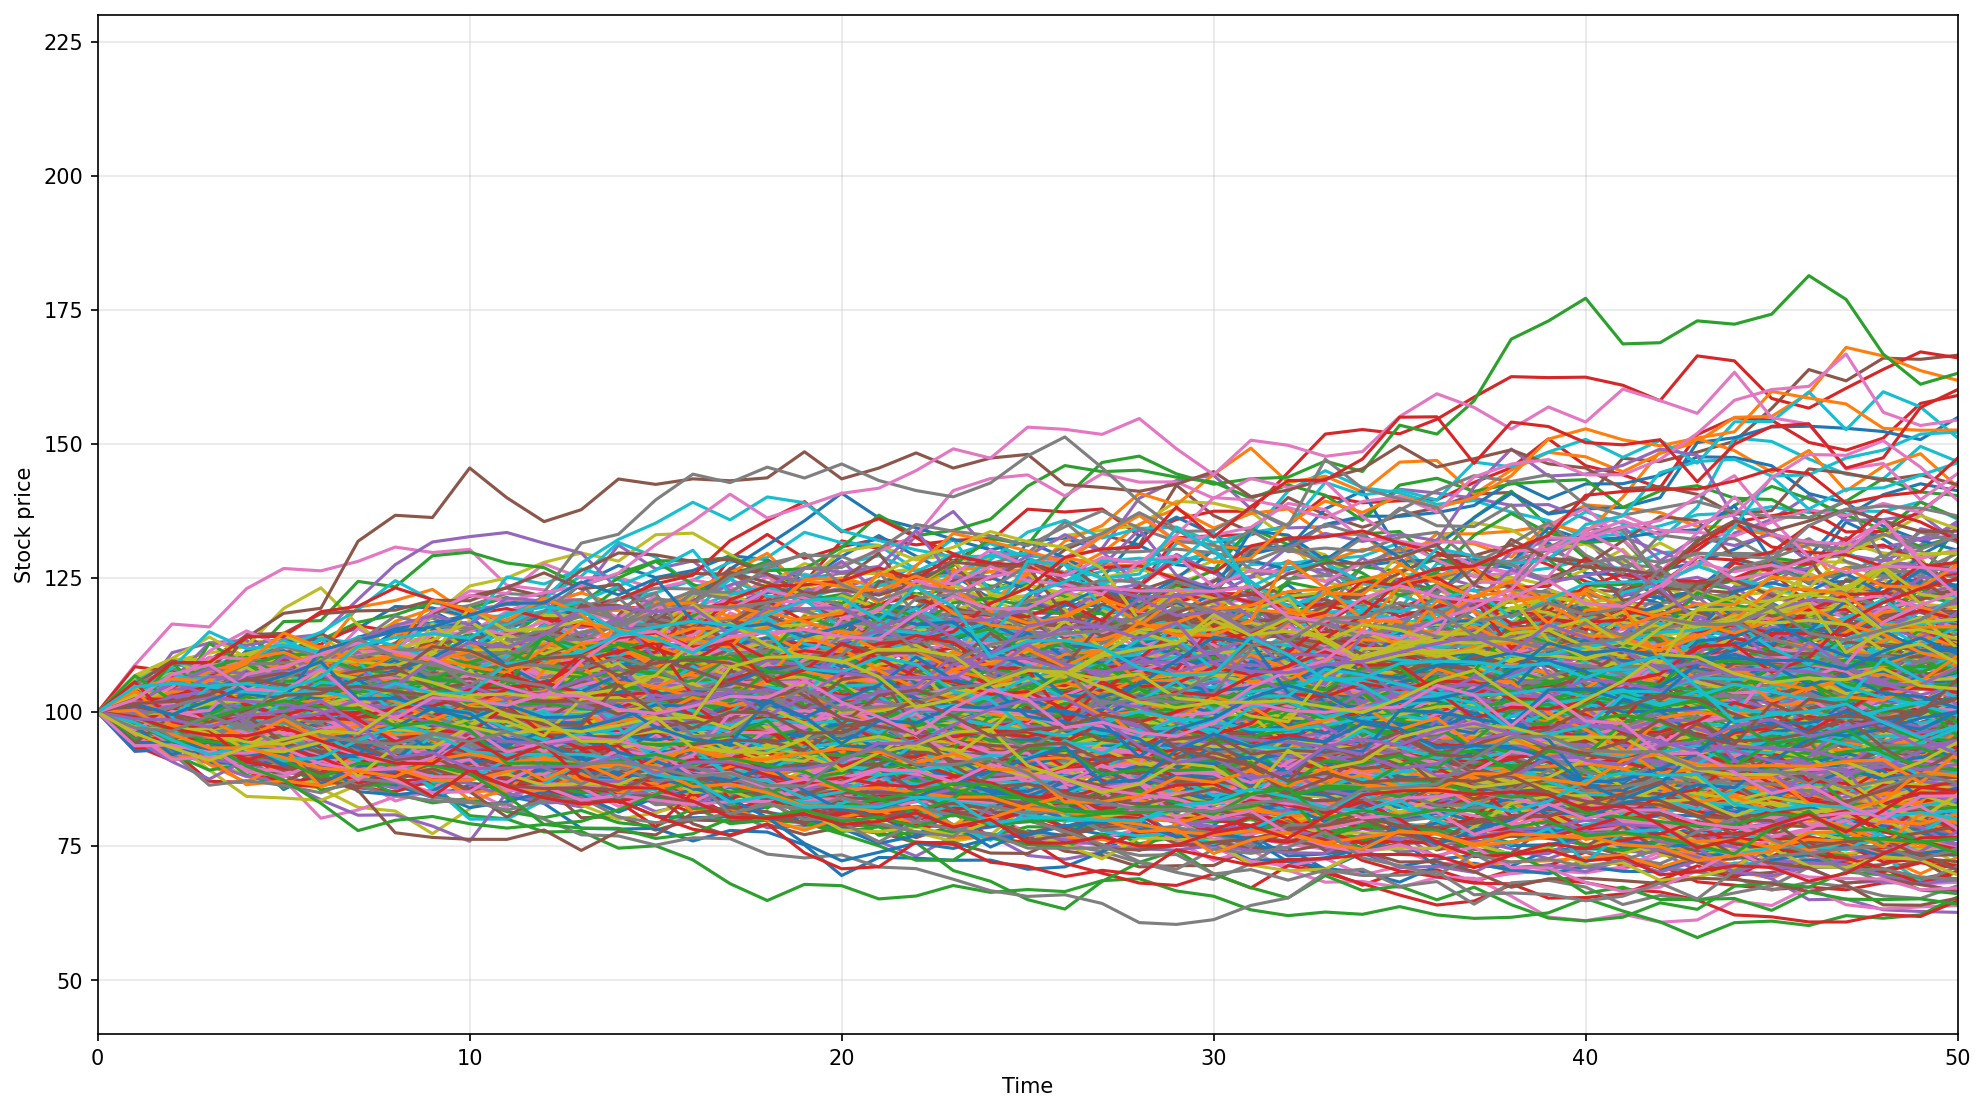

In [19]:
# Plot some of the paths
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(S[:, :500])

ax.grid(alpha=0.3)
ax.set_xlabel('Time')
ax.set_ylabel('Stock price')
ax.set_xlim(0,50)
ax.set_ylim(lb,ub)
plt.show()

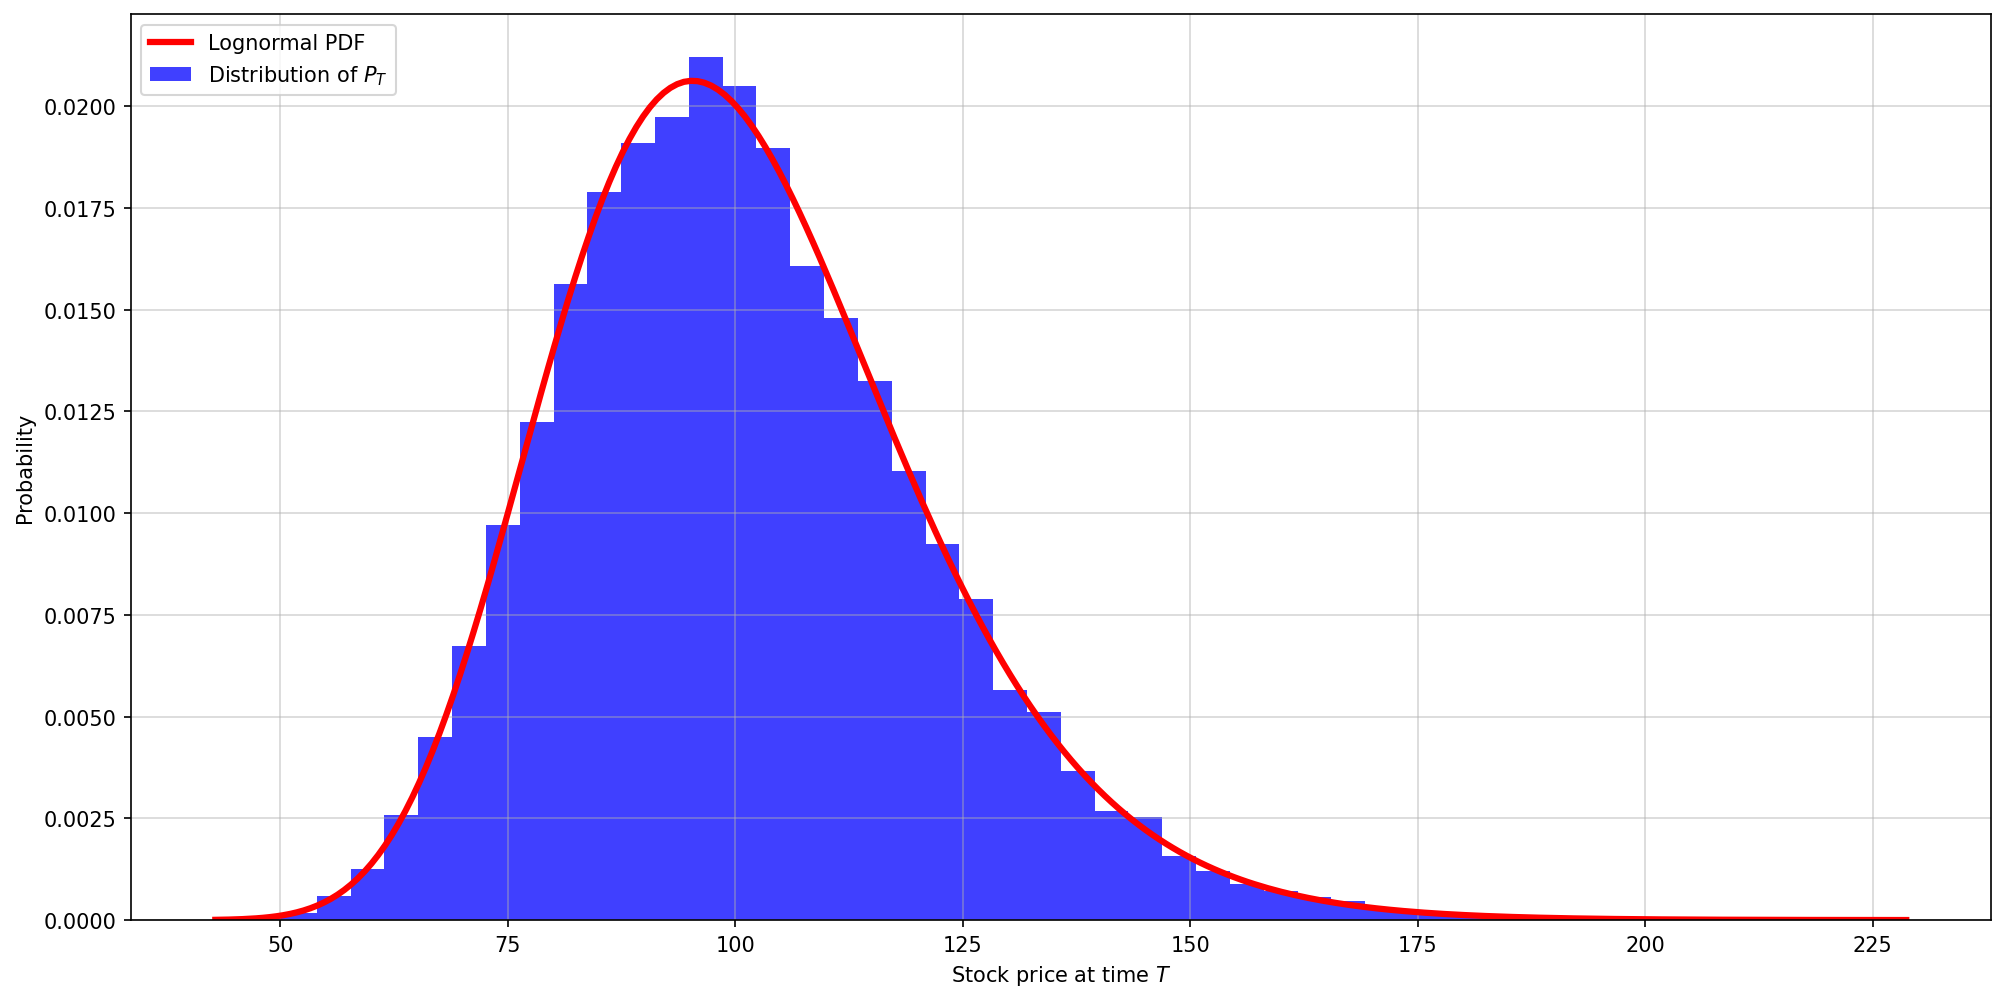

In [22]:
import scipy.stats as scs

logP = np.log(P_T)
mu = np.mean(logP)
sigma = np.std(logP)

# generate points from min to max of P for calculating the true pdf
x = np.linspace(P_T.min(), P_T.max(), 250)

# calculate pdf of lognormal distribution with shape sigma and scale exp(mu)
pdf = scs.lognorm.pdf(x, sigma, scale=np.exp(mu))

# create figure
fig, ax = plt.subplots(figsize=(16,8))
ax.hist(P_T, bins=50, density=True, color='b', alpha=0.75, label='Distribution of $P_T$')
ax.plot(x, pdf, 'r-', lw=3, label='Lognormal PDF')

ax.legend(loc='upper left')
ax.grid(alpha=0.5)
ax.set_xlabel('Stock price at time $T$')
ax.set_ylabel('Probability')

plt.show()

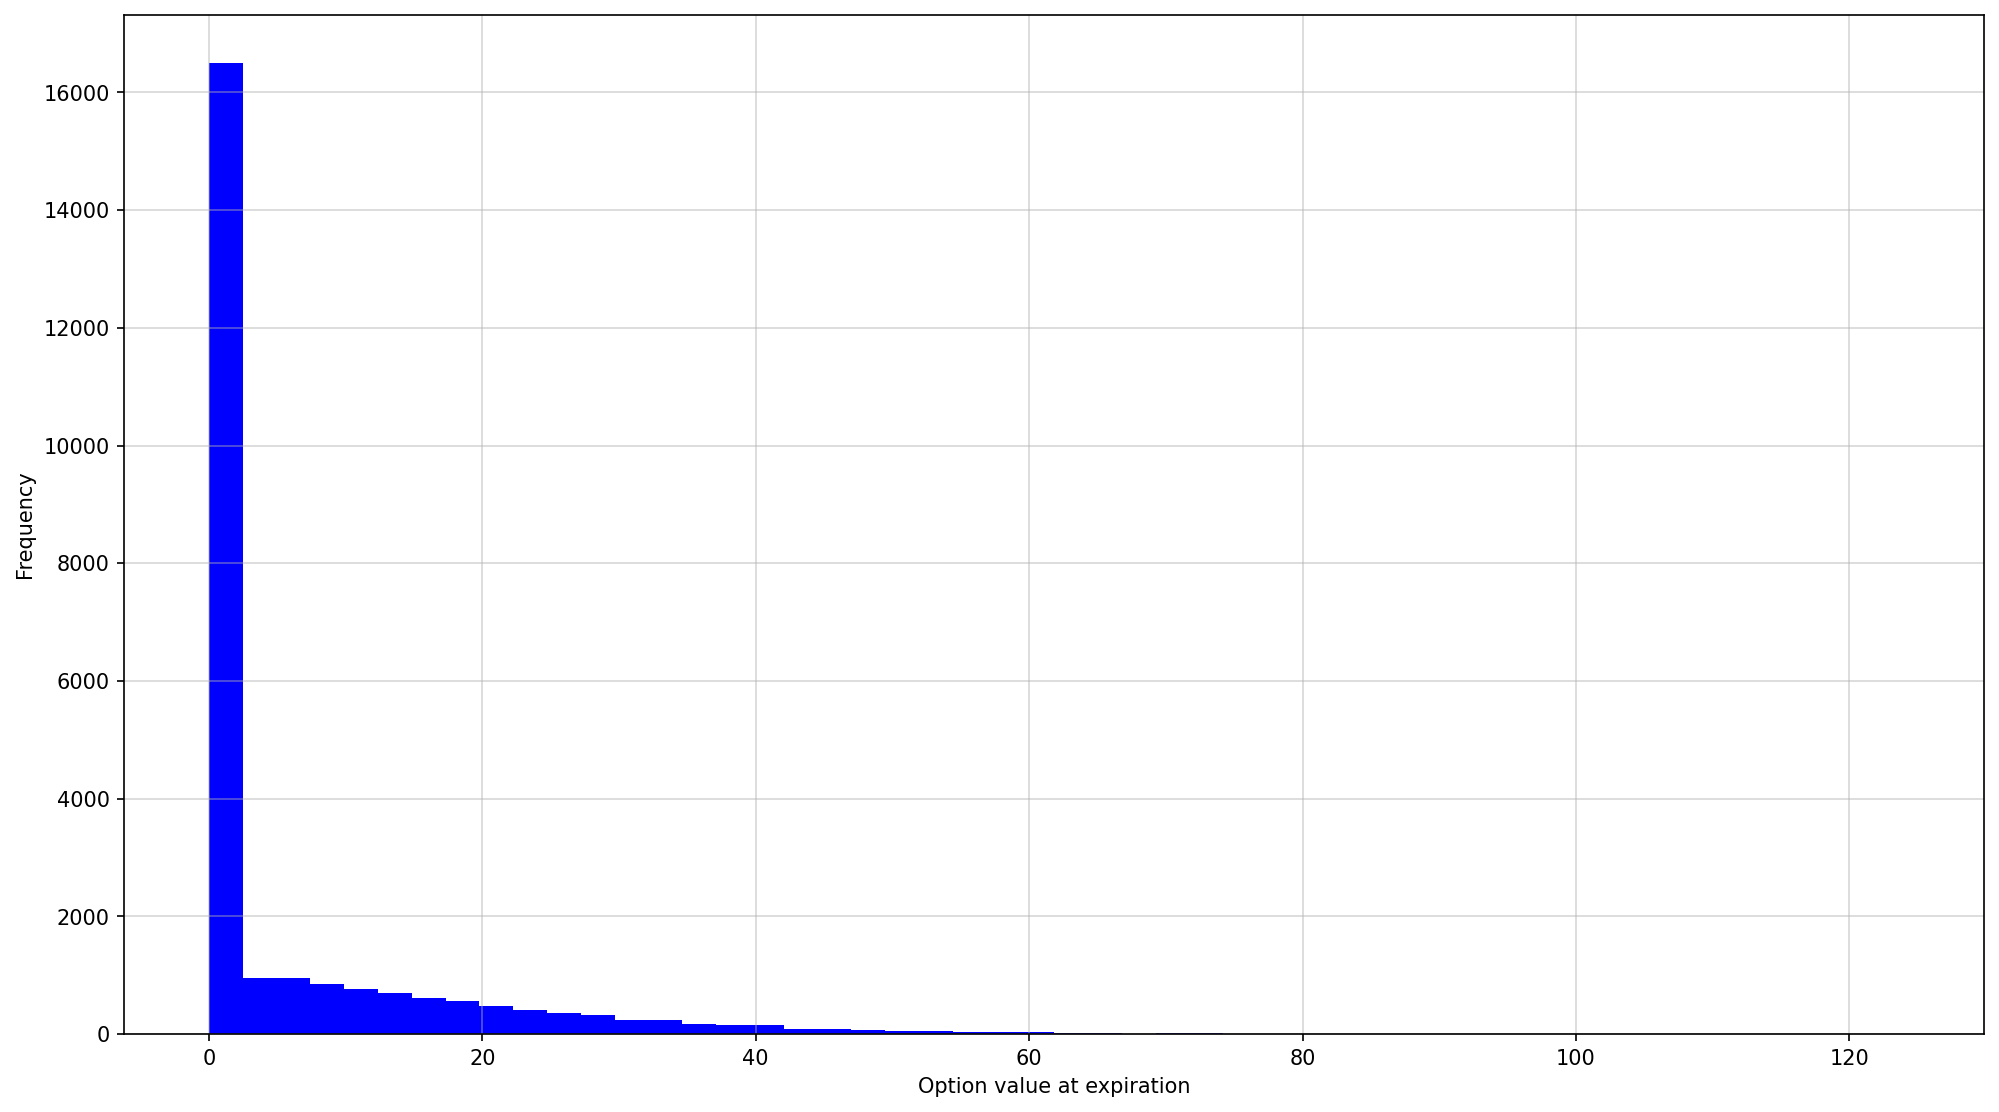

In [23]:
# Plot distribution of option values at expiration 
fig, ax = plt.subplots(figsize=(16,9))
ax.hist(np.maximum(S[-1]-K, 0), bins=50, color='b')
ax.grid(alpha=0.5)
ax.set_xlabel('Option value at expiration')
ax.set_ylabel('Frequency')
plt.show()

In [24]:
S

array([[100.        , 100.        , 100.        , ..., 100.        ,
        100.        , 100.        ],
       [101.44529034, 101.3366812 , 103.99251839, ...,  96.43907142,
         98.8101336 , 104.10891145],
       [ 96.94079148,  97.64515067, 102.4088885 , ...,  94.51892901,
         96.57703317, 103.830353  ],
       ...,
       [ 79.90113487,  86.33579333, 121.61991049, ..., 104.36993828,
         66.44256038, 115.4626477 ],
       [ 81.09600966,  82.92828214, 124.83313418, ..., 100.17256018,
         64.05363715, 111.89070892],
       [ 85.75643428,  86.6682404 , 134.92619333, ..., 103.93116682,
         68.65985932, 114.34595014]])

In [25]:
S[0]

array([100., 100., 100., ..., 100., 100., 100.])

In [26]:
S[-1]

array([ 85.75643428,  86.6682404 , 134.92619333, ..., 103.93116682,
        68.65985932, 114.34595014])